# Logistic Regression on Iris dataset
### by maryam babaei

### ۱.اضافه کردن کتابخانه های مورد نیاز برای محاسبات ماتریسی و رسم نمودار ها

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import datetime
from sklearn.linear_model import LogisticRegression
import os

### ۲.خواندن داده ها 

In [3]:
iris = datasets.load_iris()

### ۳.تشکیل کلاس لجستیک رگرسیون و تعریف توابع مورد نیاز برای اموزش و رسم نمودار  

In [4]:
class LogisticRegressionScratch:
    def __init__(self, lr=0.01, num_iter=10000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose

    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    #تعریف تابع سیگمویند
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    #محاسبه ی لاس 
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    #تعریف تابع محاسبه خط
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        self.theta = np.zeros(X.shape[1])

        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')

    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)

        return self.__sigmoid(np.dot(X, self.theta))

    def predict(self, X):
        return self.predict_prob(X).round()

### تعریف دیتا 

In [5]:
X = iris.data[:, :2]
y = (iris.target != 0) * 1

### تابع ایجاد کلاس برای دیتاست و آموزش روی آن

In [8]:
def scratchLogisticRegression(iterations):
    model = LogisticRegressionScratch(lr=0.1, num_iter=iterations)
    model.fit(X, y)
    preds = model.predict(X)
    print("scratch accuracy: ", (preds == y).mean())

### تابع محاسبه دقت و زمان

In [10]:
def scratch(numberOfIterations): 
    scratchMethodStart = datetime.datetime.now()
    scratchLogisticRegression(numberOfIterations)
    scratchMethodEnd = datetime.datetime.now()
    print("scratch duration: ", scratchMethodEnd-scratchMethodStart)


### تعیین تعداد تکرار 

In [9]:
numberOfIterations = 50000

number of iterations:  50000


### ۴. حال نمودار طول کاسبرگ بر حسب عرض کاسبرگ را به طور مجزا رسم می کنیم.

In [6]:
def plotRestrictedDataset():
    plt.figure(figsize=(10, 6))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0 - setosa')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1 - virginica')
    plt.legend()
    plt.show()

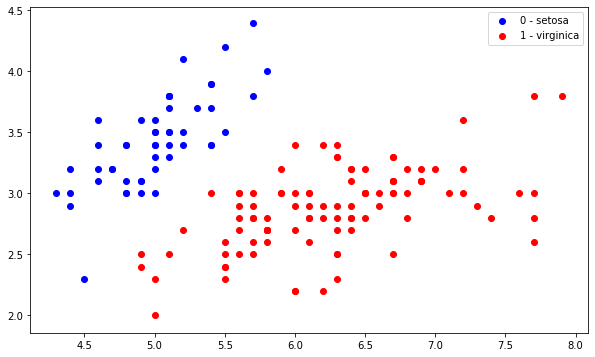

In [12]:
plotRestrictedDataset()

### ۵. مقایسه برای دو حالت استفاده از کتابخانه ی sklearn و بدون استفاده از این کتابخانه 
### توابع اموزش و محاسبه زمان و دقت قبل از مقایسه تعریف شده اند!

In [7]:
def sklearnLogisticRegression(iterations):
    model = LogisticRegression(C=iterations, solver='lbfgs')
    model.fit(X, y)
    preds = model.predict(X)
    (preds == y).mean()
    print("sklearn accuracy: ", model.score(X, y))

In [11]:
def scikit(numberOfIterations): 
    skMethodStart = datetime.datetime.now()
    sklearnLogisticRegression(numberOfIterations)
    skMethodEnd = datetime.datetime.now()
    print("sklearn duration: ", skMethodEnd-skMethodStart)

In [13]:
numberOfIterations = 50000
scratch(numberOfIterations)
scikit(numberOfIterations)

scratch accuracy:  0.9933333333333333
scratch duration:  0:00:02.797197
sklearn accuracy:  1.0
sklearn duration:  0:00:00.016941


### ۶. رسم خط تخمین زده شده روی دیتا ها

In [14]:
   def plotScratchLogisticRegression(iterations):
    model = LogisticRegressionScratch(lr=0.1, num_iter=iterations)
    model.fit(X, y)

    preds = model.predict(X)

    plt.figure(figsize=(10, 6))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0 - setosa')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1 - virginica')
    plt.legend()
    x1_min, x1_max = X[:,0].min(), X[:,0].max(),
    x2_min, x2_max = X[:,1].min(), X[:,1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    probs = model.predict_prob(grid).reshape(xx1.shape)
    plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black')
    plt.xlabel('sepal length')
    plt.ylabel('sepal width')
    plt.show()

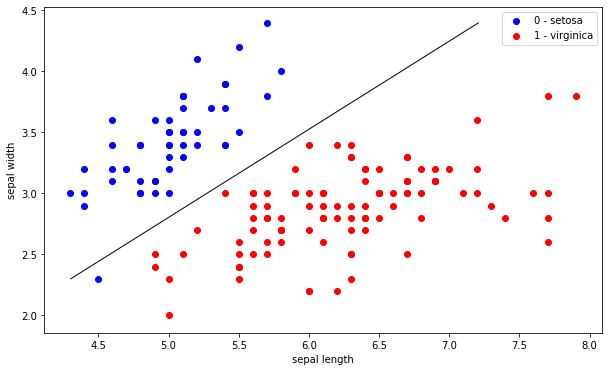

In [15]:
numberOfIterations = 50000
plotScratchLogisticRegression(numberOfIterations)